# Projekt praktyczny (regresja)

## Zbiór danych *Life Expectancy Data.csv* następujące kolumny:
- Country - państwo\
- Status - kraj rozwijający się / rozwinięty\
- Life expectancy - oczekiwana długość życia w latach\
- Adult Mortality - śmiertelność wśród dorosłych, prawdopodobieństwo śmierci w wieku między 15 a 60 lat na 1000 osób\
- infant deaths - śmiertelnośc noworodków w przeliczeniu na 1000 urodzeń\
- Alcohol - konsumpcja alkoholu wśród osób 15+ [w litrach]\
- percentage expenditure - udział wydatków na sektor zdrowia w PKB per capita\
- Hepatitis B - udział zaszczepionych dzieci do 1 roku życia na WZW typu B\
- Measles - liczba odnotowanych przypadków zachorowań na odrę na 1000 mieszkańców\
- BMI\
- under-five deaths - liczba śmierci na 1000 dzieci poniżej 5 roku życia\
- Polio - udział zaszczepionych dzieci do 1 roku życia na Polio\
- Total expenditure - udział wydatków na sektor zdrowia w całości wydatków rządowych\
- Diphtheria - udział zaszczepionych dzieci do 1 roku życia na błonicę i krztusiec\
- HIV/AIDS - śmierci dzieci poniżej 5 roku życia na 1 000 żywych urodzeń spowodowane HIV/AIDS\
- GDP - PKB per capita\
- Population - liczba mieszkańców\
- thinness 1-19 years - rozpowszechnienie chudości w wieku 1 -19 lat\
- thinness 5-9 years - rozpowszechnienie chudości w wieku 5 - 9 lat\
- Income composition of resources - Wskaźnik rozwoju społecznego HDI Human Development Index\
- Schooling - liczba lat nauczania szkolnego\

# Celem projektu jest:
1. przygotowanie i analiza dostarczonych danych
2. budowa i analiza jakości modeli do prognozy oczekiwanej długości życia w latach
3. ocena opracowanych modeli

## Zaimportuj biblioteki

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


## Wczytaj plik *Life Expectancy Data.csv* oraz wyświetl kilka pierwszych wierszy



In [5]:
eee = pd.read_csv('Life Expectancy Data.csv', sep=';')
eee.head(20)

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Albania,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,58.0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
2,Algeria,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,59.5,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
3,Angola,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,23.3,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
4,Antigua and Barbuda,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,47.7,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
5,Argentina,Developing,76.3,116.0,8,NaN,0.000000,94.0,0,62.8,...,93.0,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
6,Armenia,Developing,74.8,118.0,1,NaN,0.000000,94.0,33,54.9,...,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
7,Australia,Developed,82.8,59.0,1,NaN,0.000000,93.0,74,66.6,...,93.0,NaN,93.0,0.1,56554.387600,23789338.0,0.6,0.6,0.937,20.4
8,Austria,Developed,81.5,65.0,0,NaN,0.000000,93.0,309,57.6,...,93.0,NaN,93.0,0.1,43665.947000,8633169.0,1.9,2.1,0.892,15.9
9,Azerbaijan,Developing,72.7,118.0,5,NaN,0.000000,96.0,0,52.5,...,98.0,NaN,96.0,0.1,55.313820,9649341.0,2.8,2.9,0.758,12.7


# Preprocessing
- wyświetl rozmiar zbioru
- sprawdź ilość NaN-ów
- jesli występują kolumny z dużą lością NaN-ów usuń je
- sprawdź statystyki NaN-ów dla wierszy (m.in. jaka jest mininalna, maxymalna, srednia liczba nanów w wierszu). Jeśli są wiersze, dla których jest >=5 braki usuń je i zresetuj indexy
- wyświetl wiersze od 170 do 175
- pozostałe NaN-y uzupełnij średnią
- oblicz statystyki opisowe

In [6]:
print("Rozmiar zbioru danych:", eee.shape)

nan_counts = eee.isna().sum()
print("\nIlość NaN-ów w każdej kolumnie:\n", nan_counts)

row_nan_counts = eee.isna().sum(axis=1)
'''print("\nStatystyki NaN-ów dla wierszy:")
print("Minimalna liczba NaN-ów w wierszu:", row_nan_counts.min())
print("Maksymalna liczba NaN-ów w wierszu:", row_nan_counts.max())
print("Średnia liczba NaN-ów w wierszu:", row_nan_counts.mean())'''

eee = eee[row_nan_counts < 5].reset_index(drop=True)

print("\nWiersze od 170 do 175:")
print(eee.iloc[170:176])

numeric_columns = eee.select_dtypes(include=['number']).columns
non_numeric_columns = eee.select_dtypes(exclude=['number']).columns

eee[numeric_columns] = eee[numeric_columns].fillna(eee[numeric_columns].mean())
eee[non_numeric_columns] = eee[non_numeric_columns].fillna(eee[non_numeric_columns].mode().iloc[0])

stats = eee.describe()
print("\nStatystyki opisowe:\n", stats)
eee.head(20)

eee.info

Rozmiar zbioru danych: (183, 21)

Ilość NaN-ów w każdej kolumnie:
 Country                              0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            177
percentage expenditure               0
Hepatitis B                          9
Measles                              0
BMI                                  2
under-five deaths                    0
Polio                                0
Total expenditure                  181
Diphtheria                           0
HIV/AIDS                             0
GDP                                 29
Population                          41
thinness 1-19 years                  2
thinness 5-9 years                   2
Income composition of resources     10
Schooling                           10
dtype: int64

Wiersze od 170 do 175:
      Country      Status  Life expectancy  Adult Mortality  infant deaths  \

<bound method DataFrame.info of                                 Country      Status  Life expectancy  \
0                           Afghanistan  Developing             65.0   
1                               Albania  Developing             77.8   
2                               Algeria  Developing             75.6   
3                                Angola  Developing             52.4   
4                   Antigua and Barbuda  Developing             76.4   
..                                  ...         ...              ...   
166  Venezuela (Bolivarian Republic of)  Developing             74.1   
167                            Viet Nam  Developing             76.0   
168                               Yemen  Developing             65.7   
169                              Zambia  Developing             61.8   
170                            Zimbabwe  Developing             67.0   

     Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0              263.0             62    0.010               71.279624   
1               74.0              0    4.600              364.975229   
2               19.0             21    4.214                0.000000   
3              335.0             66    4.214                0.000000   
4               13.0              0    4.214                0.000000   
..               ...            ...      ...                     ...   
166            157.0              9    4.214                0.000000   
167            127.0             28    4.214                0.000000   
168            224.0             37    4.214                0.000000   
169             33.0             27    4.214                0.000000   
170            336.0             22    4.214                0.000000   

     Hepatitis B  Measles   BMI  ...  Polio  Total expenditure  Diphtheria  \
0           65.0     1154  19.1  ...    6.0               8.16        65.0   
1           99.0        0  58.0  ...   99.0               6.00        99.0   
2           95.0       63  59.5  ...   95.0               7.08        95.0   
3           64.0      118  23.3  ...    7.0               7.08        64.0   
4           99.0        0  47.7  ...   86.0               7.08        99.0   
..           ...      ...   ...  ...    ...                ...         ...   
166         87.0        0  62.1  ...   87.0               7.08        87.0   
167         97.0      256  17.5  ...   97.0               7.08        97.0   
168         69.0      468  41.3  ...   63.0               7.08        69.0   
169          9.0        9  23.4  ...    9.0               7.08         9.0   
170         87.0        0  31.8  ...   88.0               7.08        87.0   

     HIV/AIDS           GDP    Population  thinness 1-19 years  \
0         0.1    584.259210  3.373649e+07                 17.2   
1         0.1   3954.227830  2.887300e+04                  1.2   
2         0.1   4132.762920  3.987153e+07                  6.0   
3         1.9   3695.793748  2.785935e+06                  8.3   
4         0.2  13566.954100  1.114346e+07                  3.3   
..        ...           ...           ...                  ...   
166       0.1   7303.586047  1.114346e+07                  1.6   
167       0.1   7303.586047  1.114346e+07                 14.2   
168       0.1   7303.586047  1.114346e+07                 13.6   
169       4.1   1313.889646  1.615870e+05                  6.3   
170       6.2    118.693830  1.577745e+07                  5.6   

     thinness 5-9 years  Income composition of resources  Schooling  
0                  17.3                            0.479       10.1  
1                   1.3                            0.762       14.2  
2                   5.8                            0.743       14.4  
3                   8.2                            0.531       11.4  
4                   3.3                            0.784       13.9  
..                  ...                              ...        ...  
166               

# Wizualizacja

Wykonaj wykresy rozkładu (histogram i ramka-wąsy) zmiennej *Life expectancy* skategoryzowane w zalezności od statusu kraju. Zinterpretuj wyniki.

<Axes: xlabel='Status', ylabel='Life expectancy'>

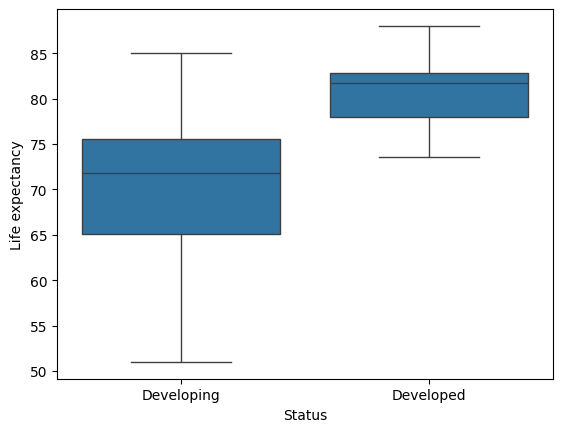

In [7]:
sns.boxplot(x='Status', y='Life expectancy', data=eee)

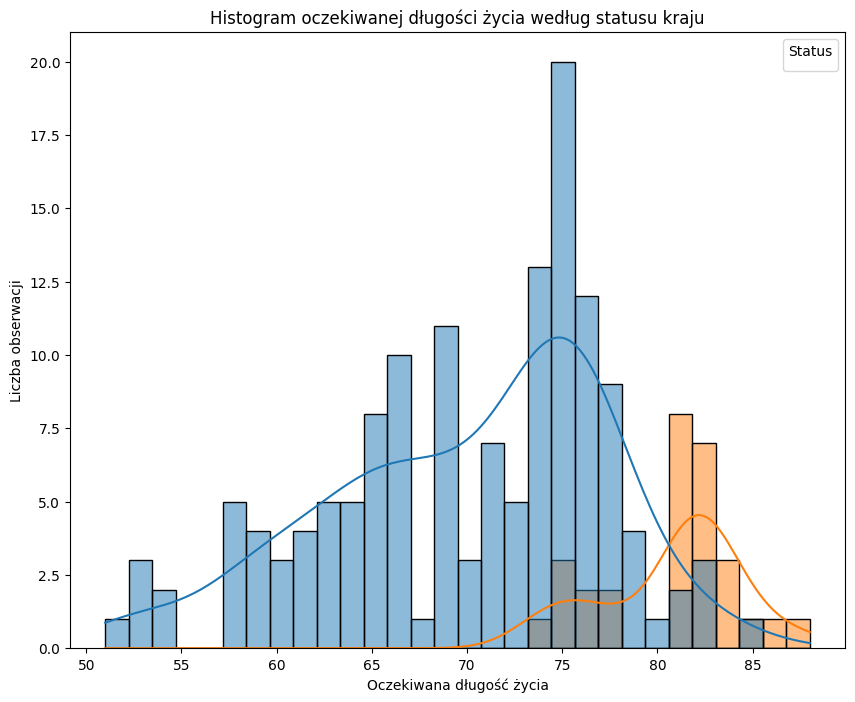

In [8]:
plt.figure(figsize=(10, 8))
ax = sns.histplot(data=eee, x='Life expectancy', hue='Status', kde=True, bins=30)
plt.title('Histogram oczekiwanej długości życia według statusu kraju')

plt.xlabel('Oczekiwana długość życia')
plt.ylabel('Liczba obserwacji')
plt.legend(title='Status')
plt.show()

# Korelacja
Wykonaj macierz korelacji dla zmiennych ilościowych. Z którymi zmiennymi skorelowana jest zmienna *Life expectancy*. Zinterpretuj te korelacje.

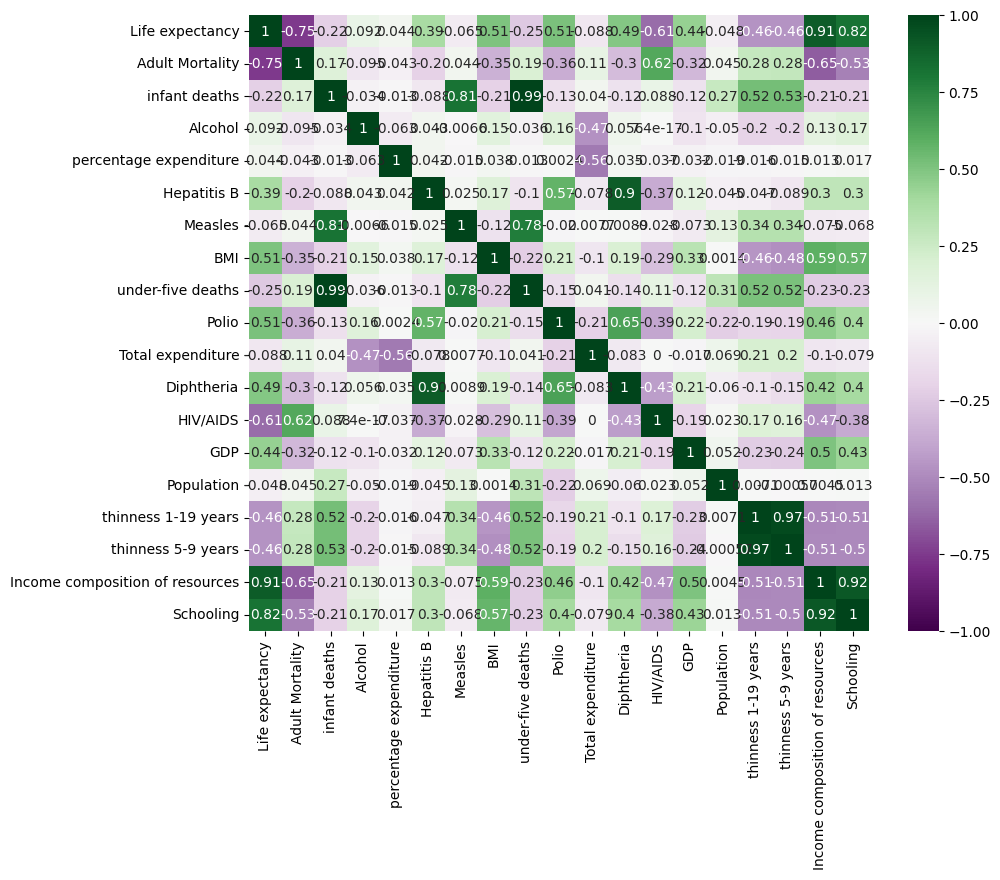

In [9]:
numeric_columns = eee.select_dtypes(include=['number'])
eee.head()
numeric_columns.head()
numeric_columns.corr()

plt.figure(figsize=(10,8))

ax = sns.heatmap(numeric_columns.corr(),
                 xticklabels=numeric_columns.corr().columns,
                 yticklabels=numeric_columns.corr().columns,
                 cmap='PRGn',
                 vmin=-1, vmax=1, # zakres kolorystyczny dla korelacji od -1 do 1
                 annot=True, center=0)

# Podziel zbiór danych na zbiór treningowy i testowy w stosunku 80% do 20%.

In [10]:
# wybór zmiennych do modelu: X - zmienne objaśniające, y - zmienna objaśniana(zależna)
X = numeric_columns[['GDP']]
Y = numeric_columns[['Life expectancy']]

X.shape
Y.shape

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
for subset in [X, Y, X_train, y_train, X_test, y_test]:
    print(subset.shape)

(171, 1)
(171, 1)
(136, 1)
(136, 1)
(35, 1)
(35, 1)


# Regresja linowa jednej zmiennej
- Zbuduj model regresji liniowej prostej (jednej zmiennej) umozliwijący przewidywanie długości życia. Odpowiednio przygotuj X (zmienna objaśniająca) i y (zmienna objasniana).
- Wykonaj predykcję dla zbioru treningowego i testowego
- Oblicz metryki (R2, MAE, MSE, RMSE). Oceń jakość modelu (dobrze dopasowany, przetrenowany, niedotrenowany).

In [11]:
35/171
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

R2_train = 0.21469958234089437,     R2_test = 0.12715834192796605,
MAE_train = 5.443423324731405,    MAE_test = 6.650914565641989,
MSE_train = 44.609336256613595,    MSE_test = 70.61676626751319,
RMSE_train = 6.679022103318239,    RMSE_test = 8.403378265168907 


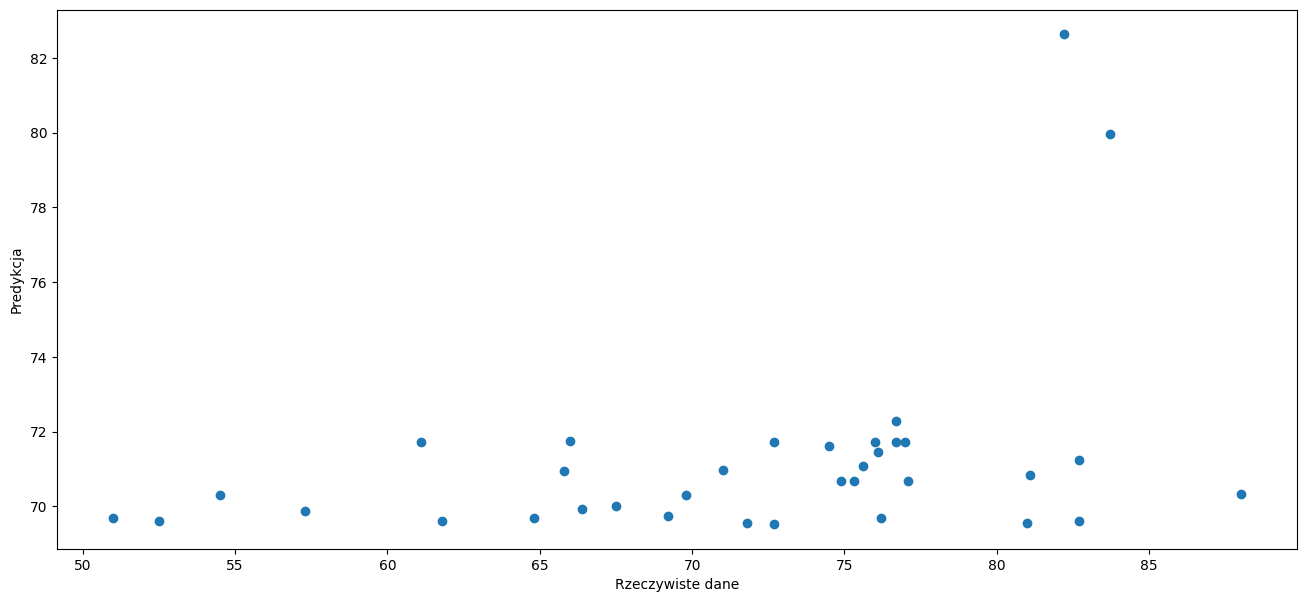

In [12]:
model = LinearRegression()
model.fit(X_train,y_train)
model.coef_
model.intercept_

y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

R2_train = r2_score(y_true = y_train, y_pred = y_predict_train)
R2_test = r2_score(y_true = y_test, y_pred = y_predict_test)

MAE_train = mean_absolute_error(y_true = y_train, y_pred = y_predict_train)
MAE_test = mean_absolute_error(y_true = y_test, y_pred = y_predict_test)

MSE_train = mean_squared_error(y_true = y_train, y_pred = y_predict_train)
MSE_test = mean_squared_error(y_true = y_test, y_pred = y_predict_test)

RMSE_train = mean_squared_error(y_true = y_train, y_pred = y_predict_train, squared = False)
RMSE_test = mean_squared_error(y_true = y_test, y_pred = y_predict_test, squared = False)

print(f'''R2_train = {R2_train},     R2_test = {R2_test},
MAE_train = {MAE_train},    MAE_test = {MAE_test},
MSE_train = {MSE_train},    MSE_test = {MSE_test},
RMSE_train = {RMSE_train},    RMSE_test = {RMSE_test} ''')

fig, ax = plt.subplots(figsize=(16,7))

ax.scatter(x=y_test,
           y=y_predict_test)

ax.set_xlabel('Rzeczywiste dane')
ax.set_ylabel('Predykcja')

plt.show()

# Regresja linowa wielu zmiennych
- Zbuduj model regresji liniowej wielu zmiennych umozliwijący przewidywanie długości życia. Odpowiednio przygotuj X (zmienne objaśniające) i y (zmienna objasniana).
- Wykonaj predykcję dla zbioru treningowego i testowego
- Oblicz metryki (R2, MAE, MSE, RMSE). Oceń jakość modelu (dobrze dopasowany, przetrenowany, niedotrenowany).